In [62]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [19]:
# creating instances
img_size = 256
bat_size = 32

In [20]:
# loading the dataset
df = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Projects/Potato/Potato Data',
    shuffle=True,
    image_size= (img_size, img_size),
    batch_size= bat_size
)

# class names
class_names = df.class_names
class_names

Found 2152 files belonging to 3 classes.


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
for image_batch, label_batch in df.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 2 1 0 1 1 0 1 1 1 0 2 2 1 1 0]


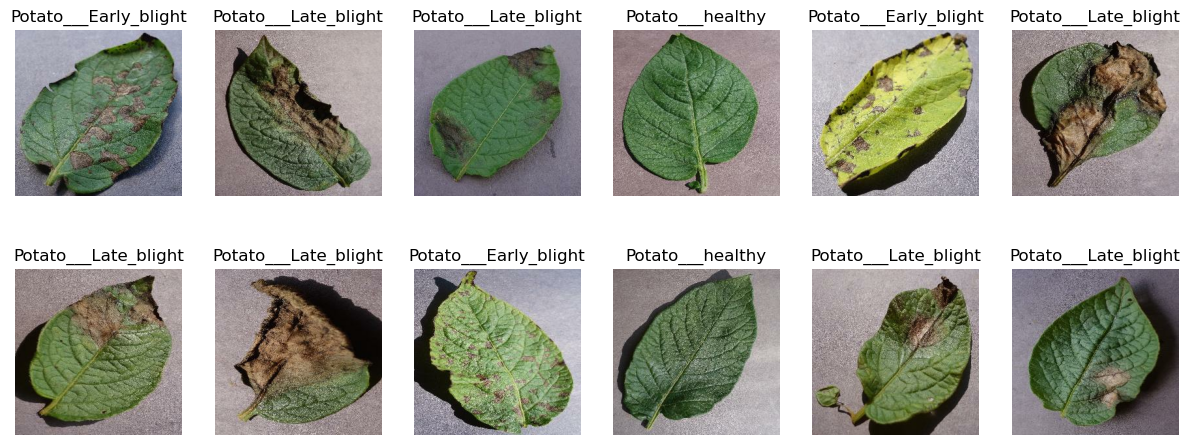

In [ ]:
# data visualization
plt.figure(figsize=(15, 15))
for i in range(12):
    plt.subplot(5, 6, i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

In [21]:
# train test split the dataset
train_size = 0.8
print(len(df)*train_size)

train_df = df.take(54)
print(len(train_df))

test_df = df.skip(54)
print(len(test_df))

val_size = 0.1
print(len(df)*val_size)

val_df = test_df.take(6)
print(len(val_df))

test_df = test_df.skip(6)
print(len(test_df))

54.400000000000006
54
14
6.800000000000001
6
8


In [22]:
def get_df_partitions(df, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    df_size = len(df)
    if shuffle:
        df = df.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * df_size)
    val_size = int(val_split * df_size)

    train_df = df.take(train_size)
    val_df = df.skip(train_size).take(val_size)
    test_df = df.skip(train_size).skip(val_size)
    return train_df, val_df, test_df

In [23]:
train_df, val_df, test_df = get_df_partitions(df)

print(len(train_df))
print(len(val_df))
print(len(test_df))

54
6
8


In [24]:
train_df = train_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_df = val_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_df = test_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size, img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [26]:
data_argumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [27]:
# building a neural network
input_shapeee = (bat_size, img_size, img_size, 3)
n_classes=3

model = models.Sequential([
    resize_and_rescale,
    data_argumentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shapeee),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape=input_shapeee)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [28]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
epochs=20

In [35]:

history = model.fit(
    train_df,
    epochs=epochs,
    validation_data=val_df
)

Epoch 1/20
54/54 [==============================] - 3s 60ms/step - loss: 0.0509 - accuracy: 0.9836 - val_loss: 0.0557 - val_accuracy: 0.9844
Epoch 2/20
54/54 [==============================] - 3s 62ms/step - loss: 0.0415 - accuracy: 0.9847 - val_loss: 0.2549 - val_accuracy: 0.8958
Epoch 3/20
54/54 [==============================] - 3s 60ms/step - loss: 0.0523 - accuracy: 0.9800 - val_loss: 0.0361 - val_accuracy: 0.9896
Epoch 4/20
54/54 [==============================] - 3s 58ms/step - loss: 0.0381 - accuracy: 0.9865 - val_loss: 0.1970 - val_accuracy: 0.9323
Epoch 5/20
54/54 [==============================] - 3s 59ms/step - loss: 0.0319 - accuracy: 0.9877 - val_loss: 0.0429 - val_accuracy: 0.9844
Epoch 6/20
54/54 [==============================] - 3s 60ms/step - loss: 0.0510 - accuracy: 0.9830 - val_loss: 0.0498 - val_accuracy: 0.9740
Epoch 7/20
54/54 [==============================] - 3s 59ms/step - loss: 0.0488 - accuracy: 0.9806 - val_loss: 0.0703 - val_accuracy: 0.9792
Epoch 8/20
54

In [36]:
loss, accuracy = model.evaluate(test_df)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

8/8 [==============================] - 0s 28ms/step - loss: 0.1101 - accuracy: 0.9648
Loss: 0.11008819192647934
Accuracy: 0.96484375


In [45]:
# data visualization
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

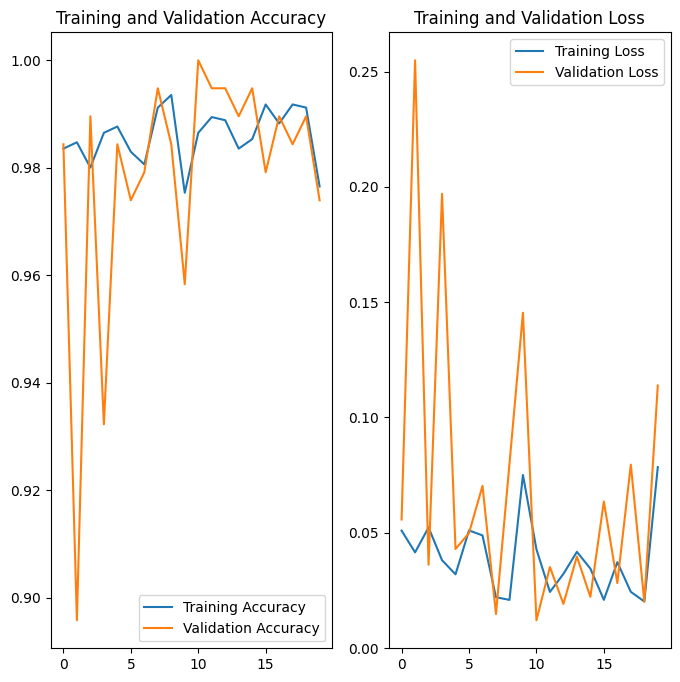

In [49]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 158ms/step
predicted label: Potato___Late_blight


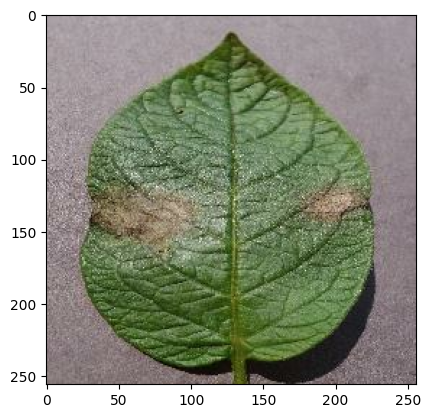

In [50]:
import numpy as np
for images_batch, labels_batch in test_df.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [53]:
plt.figure(figsize=(15, 15))
for images, labels in test_df.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

In [59]:
model_version=1
model.save(f'../content/drive/MyDrive/Colab Notebooks/Projects/Potato/Model{model_version}')